Intro and Background:


With an increase of ridesharing and taxi services in big cities, we want to be able to track determine how much of traffic is being affected by taxi services. Within a city people want to move from point A to point B, and once they reach their destination, the vehicle they were using will no longer be on the road, effectively removing one car from traffic, whenever a person completes a trip. Taxi’s will continue to be on the road, after a person has completed a trip, and thus are constantly contributing to traffic. With the data we have taken from the NYC Open Data portal, 2013 traffic count report, and a month’s worth of the Boro taxi service, we hope to be able to find a correlation between changes in day by day traffic counts with the taxi service’s day by day records.


In [1]:
#imports (use pip install 'package')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
# import geocoder
import statsmodels.api as sm
from scipy.stats import ttest_ind
import folium
% matplotlib inline
import seaborn as sns
from matplotlib import rcParams
import datetime
from IPython.display import HTML

In [2]:
#Load the csv file for green taxis August 2013 into a pandas dataframe
green = pd.read_csv('green_tripdata_2013-08.csv')
df_green = pd.DataFrame(green)

#Load the csv file for NYC 2012-2013 traffic into a pandas datafram
traffic = 'Traffic_Volume_Counts__2012-2013_.csv'
df_traffic = pd.read_csv(traffic)

In [3]:
#green taxi data before cleaning

#2013 August green taxi trip data.Green taxi's only operate in certain areas limited to the outer burroughs and 
#a small section in the city

#We want to use the dates and times along with the drop-off and pick-up coordinates. 

df_green.head(n=5)

VendorID lpep_pickup_datetime  \
2 2013-08-01 08:14:37  2013-08-01 09:09:06                    N   
  2013-08-01 09:13:00  2013-08-01 11:38:00                    N   
  2013-08-01 09:48:00  2013-08-01 09:49:00                    N   
  2013-08-01 10:38:35  2013-08-01 10:38:51                    N   
  2013-08-01 11:51:45  2013-08-01 12:03:52                    N   

                       Lpep_dropoff_datetime  Store_and_fwd_flag  RateCodeID  \
2 2013-08-01 08:14:37                      1                 0.0         0.0   
  2013-08-01 09:13:00                      1                 0.0         0.0   
  2013-08-01 09:48:00                      5                 0.0         0.0   
  2013-08-01 10:38:35                      1                 0.0         0.0   
  2013-08-01 11:51:45                      1                 0.0         0.0   

                       Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
2 2013-08-01 08:14:37               0.0              0.0                  1   
  2013-08-01 09:13:00               0.0              0.0                  2   
  2013-08-01 09:48:00               0.0              0.0                  1   
  2013-08-01 10:38:35               0.0              0.0                  1   
  2013-08-01 11:51:45               0.0              0.0                  1   

                       Dropoff_latitude  Passenger_count  Trip_distance  \
2 2013-08-01 08:14:37               0.0            21.25            0.0   
  2013-08-01 09:13:00               0.0            74.50            0.0   
  2013-08-01 09:48:00               0.0             1.00            0.1   
  2013-08-01 10:38:35               0.0             3.25            0.0   
  2013-08-01 11:51:45               0.0             8.50            0.0   

                       Fare_amount  Extra  MTA_tax  Tip_amount  Tolls_amount  \
2 2013-08-01 08:14:37          0.0    0.0      0.0         NaN         21.25   
  2013-08-01 09:13:00          0.5    0.0      0.0         NaN         75.00   
  2013-08-01 09:48:00          0.0    0.0      1.0         NaN          2.10   
  2013-08-01 10:38:35          0.0    0.0      0.0         NaN          3.25   
  2013-08-01 11:51:45          0.5    0.0      0.0         NaN          9.00   

                       Ehail_fee  Total_amount  Payment_type  Trip_type   
2 2013-08-01 08:14:37          2           NaN           NaN         NaN  
  2013-08-01 09:13:00          2           NaN           NaN         NaN  
  2013-08-01 09:48:00          2           NaN           NaN         NaN  
  2013-08-01 10:38:35          2           NaN           NaN         NaN  
  2013-08-01 11:51:45          2           NaN           NaN         NaN

In [4]:
#2012-2013 NYC traffic before cleaning

#2012-2013 Traffic count, contains a hourly reports or certain street segments in NYC, that were taken in 
#2 week intervals throughout the city. We have a total of ~400 street segments that were recorded.

df_traffic.head(n=5)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106,74,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109,74,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36,28,11.0,...,426,425,419,469,425,358,224,185,132,74
3,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/05/2013,42,28,16.0,...,393,479,441,476,446,424,305,219,171,76
4,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/06/2013,35,38,12.0,...,383,384,391,369,401,338,236,186,123,76


In [5]:
#cleaning green taxi data

#drop rows without location data
df_green = df_green[df_green.Pickup_longitude != 0]
#drop useless columns
df_green.drop(df_green.columns[[1,2,7,8,10,11,12,13,14,15,16,17,18,19]],axis = 1,inplace = True)
#rename columns because of some extra commas in the csv
df_green.columns = ['Dropoff_time','Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','Trip_distance']
#shift the row indices to a new column
df_green.index.name = 'Pickup_time'
df_green.reset_index(inplace=True)
#drop useless level 0 column created from shifting the indices
del df_green['level_0']
#rename level_1 to pickup time
df_green.rename(columns={'level_1': 'Pickup_time'}, inplace=True)

In [6]:
#Code to split date and time of pickups/drop off:
#split Pickup_time column into date and time columns
df_tempPickup = df_green['Pickup_time'].apply(lambda x: pd.Series(x.split(' ')))
#split Dropoff_time column into date and time columns
df_tempDropoff = df_green['Dropoff_time'].apply(lambda x: pd.Series(x.split(' ')))
 
#rename columns to pickup and dropoff date and time
df_tempPickup.columns = ['Pickup Date', 'Pickup Time']
df_tempDropoff.columns = ['Dropoff Date', 'Dropoff Time']
 
#drop Pickup_time and Dropoff_time columns
df_green = df_green.drop(['Dropoff_time'], axis = 1)
df_green = df_green.drop(['Pickup_time'], axis = 1)
 
#concatenate the pickup, dropoff, and green taxi dataframes
df_green = pd.concat([df_tempPickup, df_tempDropoff, df_green], axis=1)

In [7]:
#Convert pickup date into a weekway, any trips that carry over midnight, we consider the day before.
for i, row in df_green.iterrows():
    df_green.loc[i, 'Weekday'] = datetime.datetime.strptime(df_green.loc[i, 'Pickup Date'],'%Y-%m-%d').strftime('%A')
df_green.head(n=5)

,Pickup Date,Pickup Time,Dropoff Date,Dropoff Time,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Trip_distance,Weekday
0,2013-08-01,17:22:00,2013-08-01,17:22:00,-73.937767,40.758480,-73.937767,40.758480,2.5,Thursday
1,2013-08-01,17:24:00,2013-08-01,17:25:00,-73.937927,40.757843,-73.937927,40.757843,2.5,Thursday
2,2013-08-05,11:31:47,2013-08-05,11:34:01,-115.179100,36.137096,-115.179337,36.136684,1.0,Monday
3,2013-08-05,11:31:47,2013-08-05,11:32:16,-115.179100,36.137096,-115.179337,36.136684,1.2,Monday
4,2013-08-05,11:51:21,2013-08-05,11:51:36,-115.179199,36.137047,-115.179199,36.137009,1.0,Monday


In [8]:
#cleaned green taxi data

df_green.head(n=5)

,Pickup Date,Pickup Time,Dropoff Date,Dropoff Time,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Trip_distance,Weekday
0,2013-08-01,17:22:00,2013-08-01,17:22:00,-73.937767,40.758480,-73.937767,40.758480,2.5,Thursday
1,2013-08-01,17:24:00,2013-08-01,17:25:00,-73.937927,40.757843,-73.937927,40.757843,2.5,Thursday
2,2013-08-05,11:31:47,2013-08-05,11:34:01,-115.179100,36.137096,-115.179337,36.136684,1.0,Monday
3,2013-08-05,11:31:47,2013-08-05,11:32:16,-115.179100,36.137096,-115.179337,36.136684,1.2,Monday
4,2013-08-05,11:51:21,2013-08-05,11:51:36,-115.179199,36.137047,-115.179199,36.137009,1.0,Monday


In [9]:
#clean NYC 2012-2013 traffic data

#convert dataframe columns to a list
cols = list(df_traffic)
#Rearranging columns
cols.insert(0, cols.pop(cols.index('Date')))
#Roadway names and intersections are cluttering the date, moving to the back, 
#keeping segment ID so we know what are the same roads
cols.insert(31, cols.pop(cols.index('Roadway Name')))
cols.insert(31, cols.pop(cols.index('From')))
cols.insert(31, cols.pop(cols.index('To')))
#Don't know how to use 'ID'  so moving it to the back
cols.insert(31, cols.pop(cols.index('ID')))
cols.insert(3, 'Total Traffic')
cols.insert(1, 'Weekday')
#creating list of times 
Times = cols[7:31]
#Translates dates into weekdays
for i, row in df_traffic.iterrows():
    df_traffic.loc[i, 'Weekday'] = datetime.datetime.strptime(df_traffic.loc[i, 'Date'], '%m/%d/%Y').strftime('%A')
df_traffic = df_traffic.ix[:, cols]
#column for total traffic of the day
df_traffic['Total Traffic'] = df_traffic[Times].sum(axis=1)

df_traffic.head(n=5)

,Date,Weekday,Segment ID,Direction,Total Traffic,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,...,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Roadway Name,From,To,ID
0,02/02/2013,Saturday,2153,NB,5391.0,106,74,45.0,29.0,29,...,379,329,249,197,187,169,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
1,02/03/2013,Sunday,2153,NB,4085.0,109,74,55.0,37.0,26,...,242,217,210,144,125,79,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
2,02/04/2013,Monday,2153,NB,5867.0,36,28,11.0,16.0,32,...,425,358,224,185,132,74,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
3,02/05/2013,Tuesday,2153,NB,6172.0,42,28,16.0,12.0,34,...,446,424,305,219,171,76,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1
4,02/06/2013,Wednesday,2153,NB,5597.0,35,38,12.0,14.0,31,...,401,338,236,186,123,76,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,1


#convert street names to coordinates for NYC 2012-2013 traffic data (don't run this cell as it takes a lot of time and we have limited queries to the API)
#we import the new dataframe in the next cell

# Generate empty columns for GPS coordinates 
df_traffic['From Lat'] = np.nan
df_traffic['From Lon'] = np.nan
df_traffic['To Lat'] = np.nan
df_traffic['To Lon'] = np.nan

# Generate gps coordinates for the From intersection 
for i in df_traffic.index:
    # Concatenate the street names as an intersection to find the coords
    road = (df_traffic.ix[i,'Roadway Name']) + ' & ' + (df_traffic.ix[i,'From']) + ', NY'
    # Send the address 
    # If the address isn't found then the coordinates column remains as NaN 
    g = geocoder.google(road)
    df_traffic.set_value(i, 'From Lat', g.lat)
    df_traffic.set_value(i, 'From Lon', g.lng)
    
#Drop all the columns where the geocoding failed to obtain coordinates 
# Reindex 

df_traffic = df_traffic.dropna()
df_traffic = df_traffic.reset_index(drop=True)

In [10]:
#import the dataframe generated from the above cell
traff_coords = 'traffic_count_coordinates.csv'
traff_coords = pd.read_csv(traff_coords)
#clean the data with some renaming and deleting useless columns
del traff_coords['Unnamed: 0']



In [11]:
#cleaned NYC 2012-2013 traffic data with coordinates and total traffic
#convert the cleaned data to csv for use elsewhere
traff_coords.to_csv('Cleaned_Traffic_Count_Coordinates.csv')
traff_coords.head(n=5)

,Segment ID,Roadway Name,From,To,From Lat,From Lon,To Lat,To Lon
0,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,40.543227,-74.197284,40.542538,-74.197009
1,6644,RICHMOND HILL ROAD,EDINBORO ROAD,FOREST HILL ROAD,40.581193,-74.153053,40.580614,-74.152527
2,7564,MORLEY AVENUE,DALTON AVENUE,EBONY STREET,40.575439,-74.126911,40.575720,-74.126045
3,11599,OCEAN TERRACE,BUTTERWORTH AVENUE,COVERLY AVENUE,40.603704,-74.105791,40.603357,-74.104744
4,12945,LITTLE CLOVE RD,CAYUGA AVENUE,RENWICK AVENUE,40.610864,-74.100428,40.611177,-74.105598


#Data Visualization


In [12]:
#Folium mapping for traffic street segments
dfc = traff_coords

#these street segments were retrieved incorrectly with the google API
dfc = dfc.drop(dfc.index[dfc['Segment ID'] == 97387])
dfc = dfc.drop(dfc.index[dfc['Segment ID'] == 71591])
dfc = dfc.drop(dfc.index[dfc['Segment ID'] == 110262])
dfc = dfc.drop(dfc.index[dfc['Segment ID'] == 184562])
dfc = dfc.drop(dfc.index[dfc['Segment ID'] == 169883])
dfc = dfc.reset_index(drop=True)


#Create map of NYC
NYC = folium.Map(location=[dfc.loc[0,['From Lat']].item(), dfc.loc[0,'From Lon'].item()],tiles='Stamen Toner')

#redrew the map to check for errors
NYC_Traffic = NYC
for i in dfc.index:
    folium.PolyLine((
                    [dfc.loc[i,'From Lat'].item(), dfc.loc[i,'From Lon'].item()], 
                    [dfc.loc[i,'To Lat'].item(), dfc.loc[i,'To Lon'].item()]),        
                    color='red', 
                    weight=5.0, 
                    opacity=1,
                    popup=str([dfc.loc[i,['Segment ID']].item()])).add_to(NYC_Traffic)


In [13]:
# NYC_Traffic.save('NYC_Traffic.html')    
# NYC_Traffic


In [14]:
#add pick-up spots for green taxi trips
NYC_Green_Taxi = NYC_Traffic
for i in dfc.index:
    folium.RegularPolygonMarker([df_green.loc[i,'Pickup_latitude'].item(), 
                                 df_green.loc[i,'Pickup_longitude'].item()],    
                                fill_color='green',
                                number_of_sides=3,
                                radius=5).add_to(NYC_Green_Taxi)

In [15]:
#blue markers for dropoff
for i in dfc.index:
    folium.RegularPolygonMarker([df_green.loc[i,'Dropoff_latitude'].item(), 
                                 df_green.loc[i,'Dropoff_longitude'].item()],    
                                fill_color='Blue',
                                number_of_sides=6,
                                radius=5).add_to(NYC_Green_Taxi)

In [16]:
NYC_Green_Taxi.save('NYC_Green_Taxi.html')    
NYC_Green_Taxi

In [17]:
#Green Taxis are limited to picking up in the outer burroughs, so a bias of
#the pickup and drop-off in those areas is normal
NYC_Traffic

##Data Analysis

In [18]:
# Import matplotlib - the main python plotting package
import matplotlib.pyplot as plt

# Import numpy functions for generating test data to plot
import numpy as np
from numpy.random import rand

# This magic command plots figures directly in the notebook
%matplotlib inline
# This sets a higher resolution for figures
%config InlineBackend.figure_format = 'retina'

df = 'Cleaned_Traffic_Count.csv'
df = pd.read_csv(df)

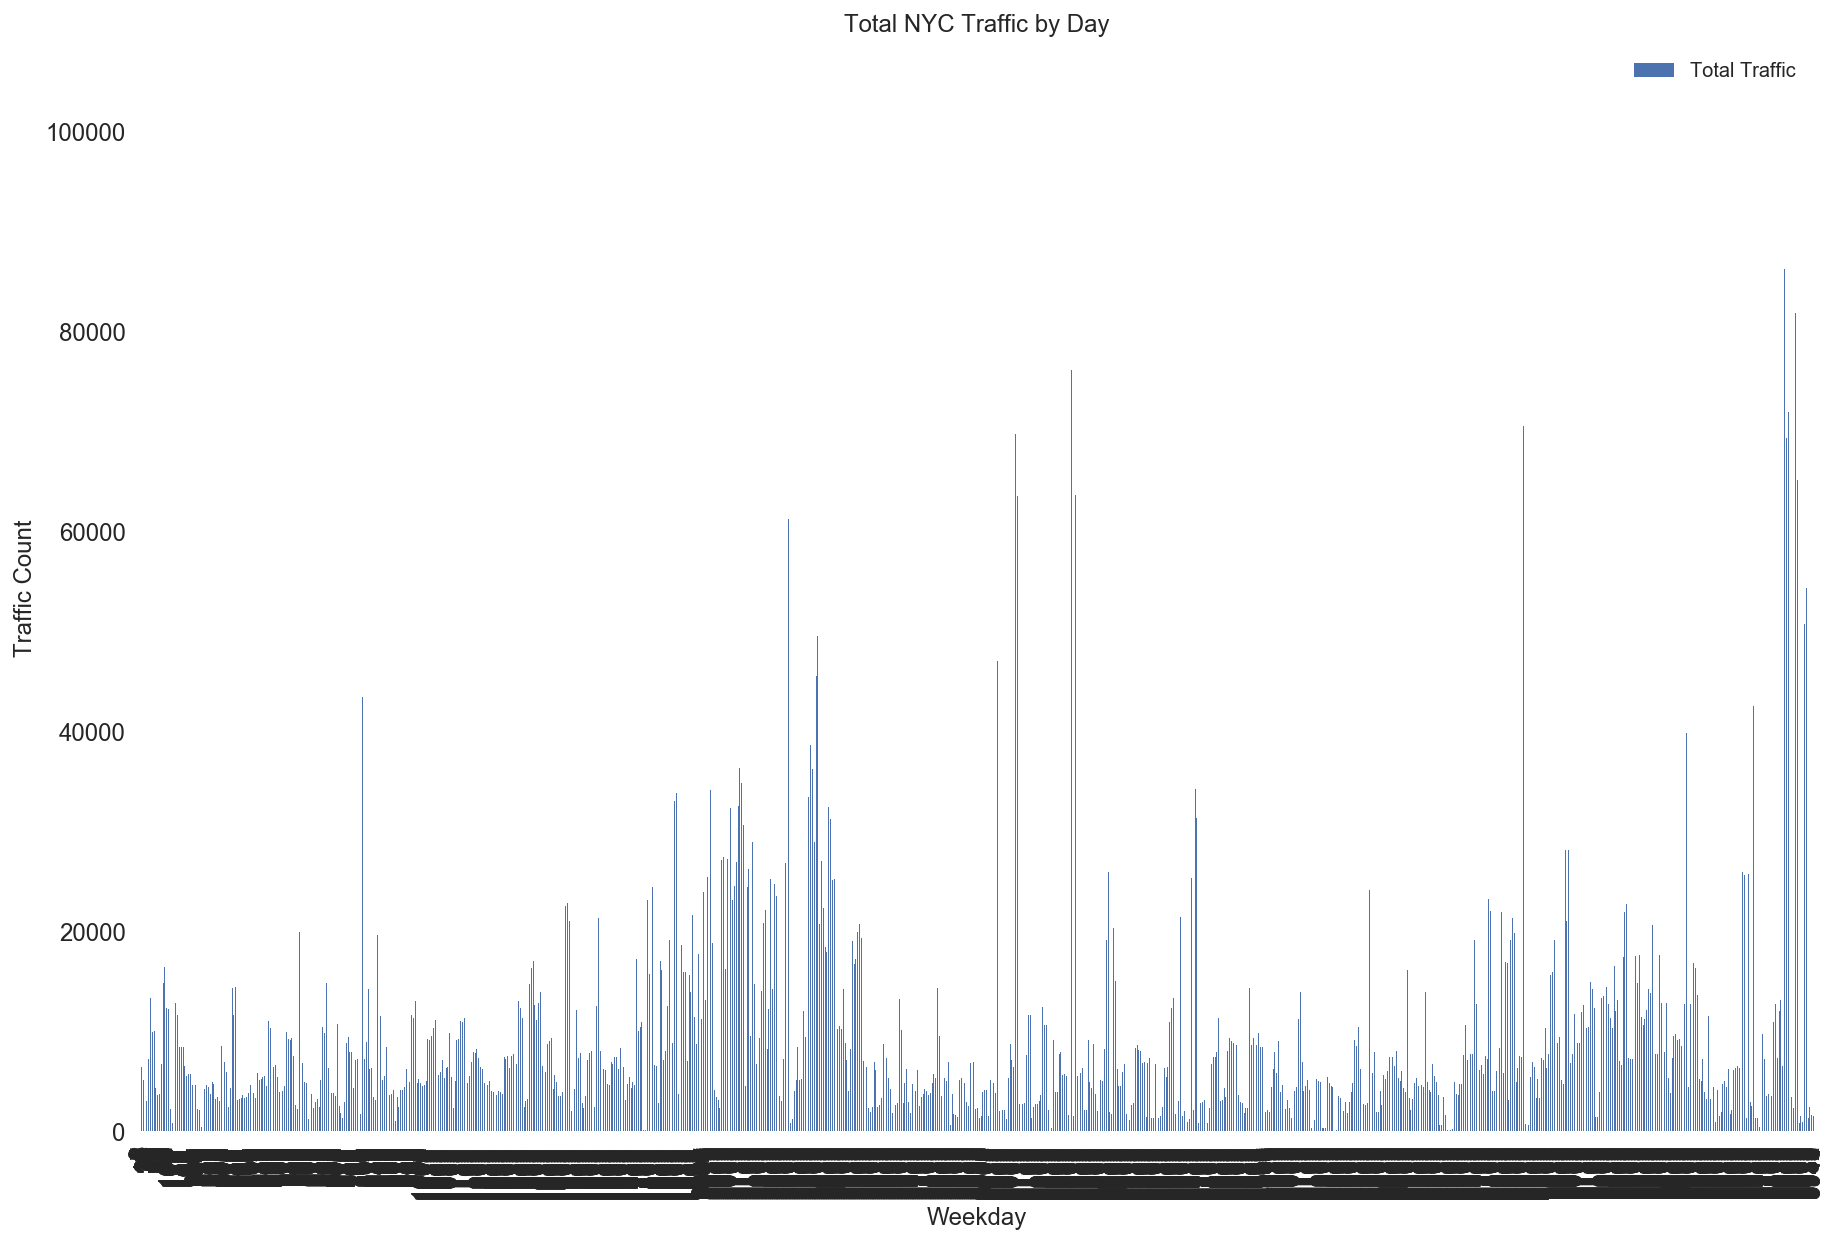

In [19]:
ax = df[['Weekday','Total Traffic']].plot(kind='bar', title ="Total NYC Traffic by Day", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Weekday", fontsize=12)

ax.set_ylabel("Traffic Count", fontsize=12)
plt.show()

Conclusion

Discussion

Because of sporadic sampling of traffic data, we have to work with this limited data set and try to glean a day-by-day relation of traffic count sets.